In [1]:
!pip install -q condacolab -q

import condacolab

condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...


In [1]:
!conda install geopandas

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [2]:
!pip install contextily

     |████████████████████████████████| 118 kB 5.0 MB/s 
     |████████████████████████████████| 19.3 MB 420 kB/s 


In [3]:
!pip install pandas cffi matplotlib adjustText matplotlib_scalebar

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=dcfbc2bf4ccb657a98e7f755ece4e7a2d999801190f029dc1bd54d171de80408
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [117]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as PathEffects
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry.point import Point
from adjustText import adjust_text
plt.rcParams["figure.figsize"] = (15,15)

### Data preprocessing

In [216]:
df = gpd.read_file("cycle_parking.json")

In [119]:
len(df)

419

In [186]:
df.head()

,OBJECTID,Stand_Type,Signpost_Type,Building_No,Street_Road_Name,ownership,Building_Business_Name,Latitude,Longitude,Google_Streetview,Capacity,ADDED_TO_PUBLIC_MAP,IGR_easting,IGR_northing,created_user,created_date,last_edited_user,last_edited_date,geometry
0,1,Cyclehoop - Pink,End of Bus Lane/No Loading,1,"Upper Queen St, south of Wellington Place",Public,Costa Coffee (side),54.596919,-5.933359,"https://www.google.co.uk/maps/@54.5969972,-5.9...",2.0,YES,333619.0,374039.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93336 54.59692)
1,2,Cyclehoop - Grey,Ticket Zone,56-66,"Upper Queen St, north of Howard St",Public,Queens House,54.596177,-5.933056,"https://www.google.co.uk/maps/@54.5961689,-5.9...",6.0,YES,333641.0,373957.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93306 54.59618)
2,3,Sheffield Stand,N/A,44,Queen St,Public,Ground coffee shop,54.597402,-5.933210,"https://www.google.co.uk/maps/@54.5974161,-5.9...",4.0,YES,333627.0,374093.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93321 54.59740)
3,4,Sheffield Stand,N/A,44,Howard St,Public,Richard Owens Opticians,54.595789,-5.933447,"https://www.google.co.uk/maps/@54.595888,-5.93...",2.0,YES,333617.0,373913.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93345 54.59579)
4,5,Sheffield Stand,N/A,28-40,Howard St,Public,Deanes Restaurant,54.595821,-5.932702,"https://www.google.co.uk/maps/@54.5958701,-5.9...",2.0,YES,333665.0,373918.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93270 54.59582)


### Create the whole address for the interactive map

In [217]:
df['Whole_address'] = df['Street_Road_Name']+ ', ' + df['Building_No'] +', '+df['Building_Business_Name']

In [212]:
df.head()

,OBJECTID,Stand_Type,Signpost_Type,Building_No,Street_Road_Name,ownership,Building_Business_Name,Latitude,Longitude,Google_Streetview,Capacity,ADDED_TO_PUBLIC_MAP,IGR_easting,IGR_northing,created_user,created_date,last_edited_user,last_edited_date,geometry,Whole_address
0,1,Cyclehoop - Pink,End of Bus Lane/No Loading,1,"Upper Queen St, south of Wellington Place",Public,Costa Coffee (side),54.596919,-5.933359,"https://www.google.co.uk/maps/@54.5969972,-5.9...",2.0,YES,333619.0,374039.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93336 54.59692),"Upper Queen St, south of Wellington Place, 1, ..."
1,2,Cyclehoop - Grey,Ticket Zone,56-66,"Upper Queen St, north of Howard St",Public,Queens House,54.596177,-5.933056,"https://www.google.co.uk/maps/@54.5961689,-5.9...",6.0,YES,333641.0,373957.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93306 54.59618),"Upper Queen St, north of Howard St, 56-66, Que..."
2,3,Sheffield Stand,N/A,44,Queen St,Public,Ground coffee shop,54.597402,-5.933210,"https://www.google.co.uk/maps/@54.5974161,-5.9...",4.0,YES,333627.0,374093.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93321 54.59740),"Queen St, 44, Ground coffee shop"
3,4,Sheffield Stand,N/A,44,Howard St,Public,Richard Owens Opticians,54.595789,-5.933447,"https://www.google.co.uk/maps/@54.595888,-5.93...",2.0,YES,333617.0,373913.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93345 54.59579),"Howard St, 44, Richard Owens Opticians"
4,5,Sheffield Stand,N/A,28-40,Howard St,Public,Deanes Restaurant,54.595821,-5.932702,"https://www.google.co.uk/maps/@54.5958701,-5.9...",2.0,YES,333665.0,373918.0,DSB_GIS,1620298502493,DSB_GIS,1620298502493,POINT (-5.93270 54.59582),"Howard St, 28-40, Deanes Restaurant"


### drop NAs

In [218]:
df = df[df['Latitude'].notna()]
df = df[df['Longitude'].notna()]

In [220]:
len(df)

393

In [221]:
df['Stand_Type'].unique()

array(['Cyclehoop - Pink', 'Cyclehoop - Grey', 'Sheffield Stand',
       'Omega Stand', 'Various', 'Hoop Cycle Stand', 'Cyclehoop – Grey',
       'Sheffield', 'Toast Rack', 'Curve Cycle Stand', 'Custom Stand',
       'Cyclehoop - Blue', 'Austrian Cycle Stand', 'Cyclehoop - Orange',
       'Cycle Rack'], dtype=object)

In [191]:
len(df['Stand_Type'].unique())

15

In [8]:
df.columns

Index(['OBJECTID', 'Stand_Type', 'Signpost_Type', 'Building_No',
       'Street_Road_Name', 'ownership', 'Building_Business_Name', 'Latitude',
       'Longitude', 'Google_Streetview', 'Capacity', 'ADDED_TO_PUBLIC_MAP',
       'IGR_easting', 'IGR_northing', 'created_user', 'created_date',
       'last_edited_user', 'last_edited_date', 'geometry'],
      dtype='object')

## Plot Cycle Parking Stops by Stand Type in Belfast


In [222]:
#Compute distance for one degree in meters
points = gpd.GeoSeries([Point(37.55, 55.75), Point(38.55, 55.75)], crs=3857) # Projected WGS 84 - degrees
points = points.to_crs(32619) # Projected WGS 84 - meters
distance_meters = points[0].distance(points[1])

In [223]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Cycle Parking Stops by Stand Type in Belfast')

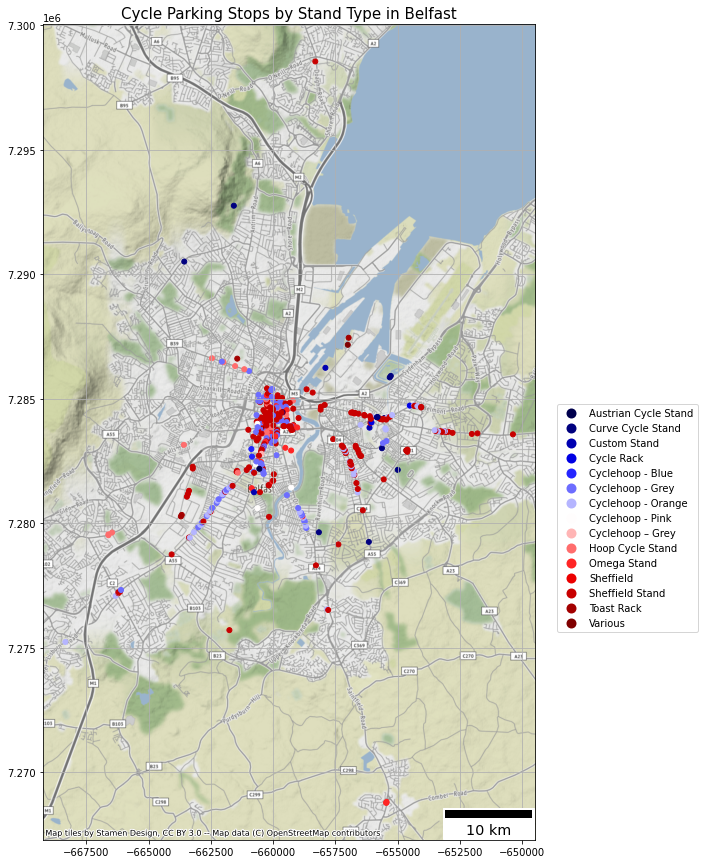

In [224]:
import numpy as np

#cro_geo = df.set_crs(epsg = 4326)
cro_geo = df.to_crs(epsg = 3857)

#Add legend
base = cro_geo.plot(marker='o',
                    markersize = 25, 
                    column = 'Stand_Type',
                    cmap='seismic',
                    legend = True, 
                    legend_kwds={'bbox_to_anchor': (1.34, 0.54)})
cx.add_basemap(base)


#Add grid
matplotlib.pyplot.grid(visible=True)
#Add scale bar
base.add_artist(ScaleBar(distance_meters, 
                         location='lower right', 
                         font_properties={'size': 'x-large'}))
#Add name
plt.title("Cycle Parking Stops by Stand Type in Belfast", fontsize = 15)

### Interactive Map of Cycle Parking Stops With Addresses and Building Names 

In [225]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, FastMarkerCluster

In [226]:
map = folium.Map(location=[cro_geo.Latitude.mean(), cro_geo.Longitude.mean()], zoom_start=14, control_scale=True)

for index, location_info in cro_geo.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup = location_info["Whole_address"]).add_to(map)
  
map